[View in Colaboratory](https://colab.research.google.com/github/clee1994/DLclass/blob/master/HW_TensorFlow_with_GPU.ipynb)

# Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [167]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [0]:
def matcompl(rows, cols, mean, stdev, rank, percent_missing, lr, steps, fig,title_str):
  B_orig_distr = (np.random.randn(rows,cols))*stdev + mean
  B_orig_noise = np.random.rand(rows,cols)-0.5
  B_orig_fin = np.array(B_orig_distr + B_orig_noise,dtype=np.float32).T
  B_orig_df = pd.DataFrame(B_orig_fin)

  
  missing_entries = np.random.choice(B_orig_fin.flatten(), int(B_orig_fin.flatten().shape[0]*percent_missing), replace=False)
  B_df_masked = B_orig_df.copy()
  for i in missing_entries:
    B_df_masked[B_df_masked == i] = np.NAN
  np_mask = B_df_masked.notnull()
  tf_mask = tf.Variable(np_mask.values)
  B = tf.constant(B_df_masked.values)

  
  shape = B_df_masked.values.shape

  # Initializing random H and W
  temp_H = np.random.randn(rank, shape[1]).astype(np.float32)
  temp_H = np.divide(temp_H, temp_H.max())

  temp_W = np.random.randn(shape[0], rank).astype(np.float32)
  temp_W = np.divide(temp_W, temp_W.max())

  H =  tf.Variable(temp_H)
  W = tf.Variable(temp_W)
  WH = tf.matmul(W, H)
  
  cost = tf.reduce_sum(tf.pow(tf.boolean_mask(B, tf_mask) - tf.boolean_mask(WH, tf_mask), 2))
  
  train_step = tf.train.GradientDescentOptimizer(lr).minimize(cost)
  init = tf.global_variables_initializer()

  cost_hist = []

  with tf.Session() as sess:
      sess.run(init)
      for i in range(steps):
          sess.run(train_step)
          #sess.run(clip)
          #if i%1000==0:
              #print("\nCost: %f" % sess.run(cost))
              #print("*"*40)
          cost_hist.append(sess.run(cost))
      learnt_W = sess.run(W)
      learnt_H = sess.run(H)

  
  fig.plot(cost_hist)
  fig.set_ylabel('Cost')
  fig.set_xlabel('Iterations')
  fig.set_title(title_str)
  #plt.show()
      
    
    
    






In [0]:


#function, rows and cols, missing level, gradien vs. sgd.

mean = 2
stdev = 4

rank = 5
percent_missing = 0.25


# Learning rate
lr = 0.0001
# Number of steps
steps = 500

f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2)

axes_list = [ax1,ax2,ax3,ax4]

for i in range(4):
  rows = 10**i
  cols = 10**i
  matcompl(rows, cols, mean, stdev, rank, percent_missing, lr, steps, axes_list[i],str(cols))

f.show()


Cost: 1391.350342
****************************************

Cost: 307.174225
****************************************

Cost: 80.865509
****************************************

Cost: 51.157532
****************************************

Cost: 39.104485
****************************************

Cost: 33.011574
****************************************

Cost: 29.157318
****************************************

Cost: 26.426262
****************************************

Cost: 24.406675
****************************************

Cost: 22.805355
****************************************


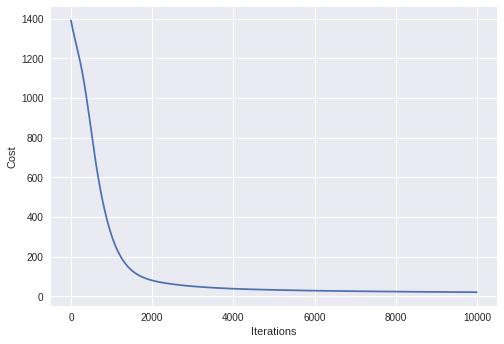